In [2]:
import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

import tensorflow as tf
from tensorflow import keras

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

import os
import sys
import tempfile

In [3]:
mpl.rcParams['figure.figsize'] = (12, 10)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [4]:
file = tf.keras.utils
data = pd.read_csv('https://storage.googleapis.com/download.tensorflow.org/data/creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
data[['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V26', 'V27', 'V28', 'Amount', 'Class']].describe()

,Time,V1,V2,V3,V4,V5,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [7]:
neg , pos = np.bincount(data['Class'])
total = neg + pos
print('Example:\n Total:{}\n Positive:{}({:.2f}% of total)\n'.format(total, pos, 100*pos/total))

Example:
 Total:284807
 Positive:492(0.17% of total)



In [8]:
cleaned_df = data.copy()
cleaned_df.pop('Time')

eps = 0.001 
cleaned_df['Log Ammount'] = np.log(cleaned_df.pop('Amount')+eps)

In [9]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [10]:
train , test = train_test_split(cleaned_df, test_size=0.2)
train , val = train_test_split(train, test_size=0.2)

In [11]:
train_labels = np.array(train.pop('Class'))
bool_train_labels = train_labels != 0
val_labels = np.array(val.pop('Class'))
test_labels = np.array(test.pop('Class'))

In [12]:
train_features = np.array(train)
val_features = np.array(val)
test_features = np.array(test)

In [13]:
print(f'Average class probability in training set: {train_labels.mean():.4f}')
print(f'Average class probability in validation set: {val_labels.mean():.4f}')
print(f'Average class probability in test set: {test_labels.mean():.4f}')

Average class probability in training set: 0.0017
Average class probability in validation set: 0.0018
Average class probability in test set: 0.0018


In [14]:
scalar = StandardScaler()
train_features = scalar.fit_transform(train_features)

val_features = scalar.transform(val_features)
test_features = scalar.transform(test_features)

In [15]:
train_features = np.clip(train_features, -5, 5)
val_features = np.clip(val_features, -5, 5)
test_features = np.clip(test_features, -5, 5)

In [16]:
print('Training labels shape:', train_labels.shape)
print('Validation labels shape:', val_labels.shape)
print('Test labels shape:', test_labels.shape)

print('Training features shape:', train_features.shape)
print('Validation features shape:', val_features.shape)
print('Test features shape:', test_features.shape)

Training labels shape: (182276,)
Validation labels shape: (45569,)
Test labels shape: (56962,)
Training features shape: (182276, 29)
Validation features shape: (45569, 29)
Test features shape: (56962, 29)


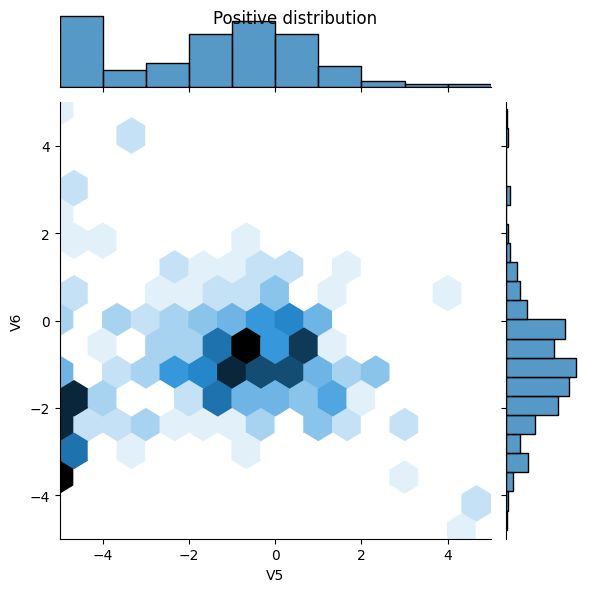

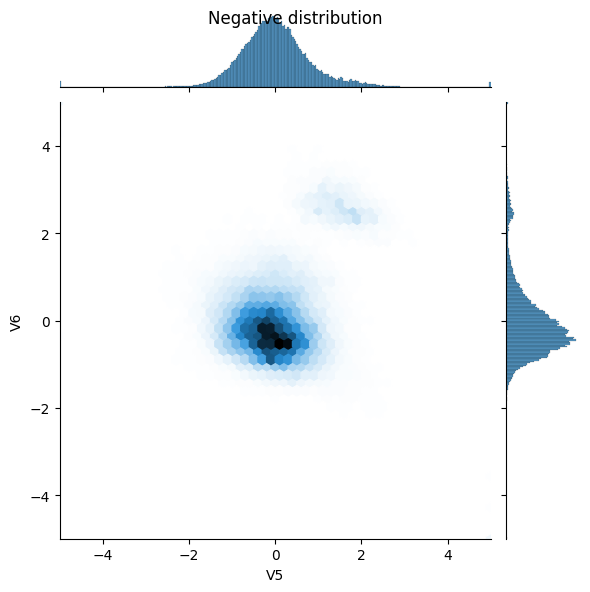

In [17]:
pos = pd.DataFrame(train_features[ bool_train_labels], columns=train.columns)
neg = pd.DataFrame(train_features[~bool_train_labels], columns=train.columns)

sns.jointplot(x=pos['V5'], y=pos['V6'],
              kind='hex', xlim=(-5,5), ylim=(-5,5))
plt.suptitle("Positive distribution")

sns.jointplot(x=neg['V5'], y=neg['V6'],
              kind='hex', xlim=(-5,5), ylim=(-5,5))
_ = plt.suptitle("Negative distribution")

In [18]:
METRICS = [
    keras.metrics.BinaryCrossentropy(name = 'cross entropy'),
    keras.metrics.MeanSquaredError(name = 'Brier Score'),
    keras.metrics.TruePositives(name = 'tp'),
    keras.metrics.FalsePositives(name = 'fp'),
    keras.metrics.TrueNegatives(name = 'tn'),
    keras.metrics.FalseNegatives(name = 'fn'),
    keras.metrics.Precision(name = 'precision'),
    keras.metrics.Recall(name = 'recall'),
    keras.metrics.AUC(name = 'auc'),
    keras.metrics.AUC(name = 'prc', curve = 'PR')
]

In [35]:
def make_model(metrics=METRICS, output_bias=None):
  if output_bias is not None:
    output_bias = tf.keras.initializers.Constant(output_bias)
  model = keras.Sequential([
      keras.layers.Dense(
          16, activation='relu',
          input_shape=(train_features.shape[-1],)),
      keras.layers.Dropout(0.5),
      keras.layers.Dense(1, activation='sigmoid',
                         bias_initializer=output_bias),
  ])

  model.compile(
      optimizer=keras.optimizers.Adam(learning_rate=1e-3),
      loss=keras.losses.BinaryCrossentropy(),
      metrics=metrics)

  return model

In [36]:
EPOCHS = 100
BATCH_SIZE = 2048

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_prc', 
    verbose=1,
    patience=10,
    mode='max',
    restore_best_weights=True)

In [37]:
model = make_model()
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 16)                480       
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 497 (1.94 KB)
Trainable params: 497 (1.94 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [38]:
model.predict(train_features[:10])

1/1 [==============================] - 0s 130ms/step


array([[0.20373105],
       [0.1323821 ],
       [0.03586496],
       [0.20710346],
       [0.1697267 ],
       [0.20057091],
       [0.34748533],
       [0.20761845],
       [0.12643921],
       [0.1546347 ]], dtype=float32)

In [39]:
results = model.evaluate(train_features, train_labels, batch_size=BATCH_SIZE, verbose=0)
print("Loss: {:0.4f}".format(results[0]))

Loss: 0.4295


In [40]:
initial_bias = np.log([pos/neg])
initial_bias

/var/folders/wb/l2mw28t51y3d4yn7d7r5hr9w0000gn/T/ipykernel_3122/1694695139.py:1: RuntimeWarning: invalid value encountered in log
  initial_bias = np.log([pos/neg])


array([[[        nan,         nan,         nan, ...,         nan,
          4.19681724,  1.81410447],
        [ 1.66905746,  1.95187895,         nan, ...,  0.        ,
          0.52457821,         nan],
        [        nan,         nan, -1.05802591, ..., -3.19919408,
                 nan,         nan],
        ...,
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]]])

In [42]:
model = make_model(output_bias=initial_bias)
model.predict(train_features[:10])

TypeError: Eager execution of tf.constant with unsupported shape. Tensor [[[       nan        nan        nan ...        nan  4.1968174  1.8141044]
  [ 1.6690575  1.9518789        nan ...  0.         0.5245782        nan]
  [       nan        nan -1.058026  ... -3.1991942        nan        nan]
  ...
  [       nan        nan        nan ...        nan        nan        nan]
  [       nan        nan        nan ...        nan        nan        nan]
  [       nan        nan        nan ...        nan        nan        nan]]] (converted from [[[        nan         nan         nan ...         nan  4.19681724
    1.81410447]
  [ 1.66905746  1.95187895         nan ...  0.          0.52457821
           nan]
  [        nan         nan -1.05802591 ... -3.19919408         nan
           nan]
  ...
  [        nan         nan         nan ...         nan         nan
           nan]
  [        nan         nan         nan ...         nan         nan
           nan]
  [        nan         nan         nan ...         nan         nan
           nan]]]) has 5277101 elements, but got `shape` (1,) with 1 elements).

In [43]:
results = model.evaluate(train_features, train_labels, batch_size=BATCH_SIZE, verbose=0)
print("Loss: {:0.4f}".format(results[0]))

Loss: 0.4295


In [44]:
initial_weights = os.path.join(tempfile.mkdtemp(), 'initial_weights')
model.save_weights(initial_weights)

In [45]:
model = make_model()
model.load_weights(initial_weights)
model.layers[-1].bias.assign([0.0])
zero_bias_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=20,
    validation_data=(val_features, val_labels), 
    verbose=0)

In [46]:
model = make_model()
model.load_weights(initial_weights)
careful_bias_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=20,
    validation_data=(val_features, val_labels), 
    verbose=0)

In [47]:
def plot_loss(history, label, n):
  # Use a log scale on y-axis to show the wide range of values.
  plt.semilogy(history.epoch, history.history['loss'],
               color=colors[n], label='Train ' + label)
  plt.semilogy(history.epoch, history.history['val_loss'],
               color=colors[n], label='Val ' + label,
               linestyle="--")
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()

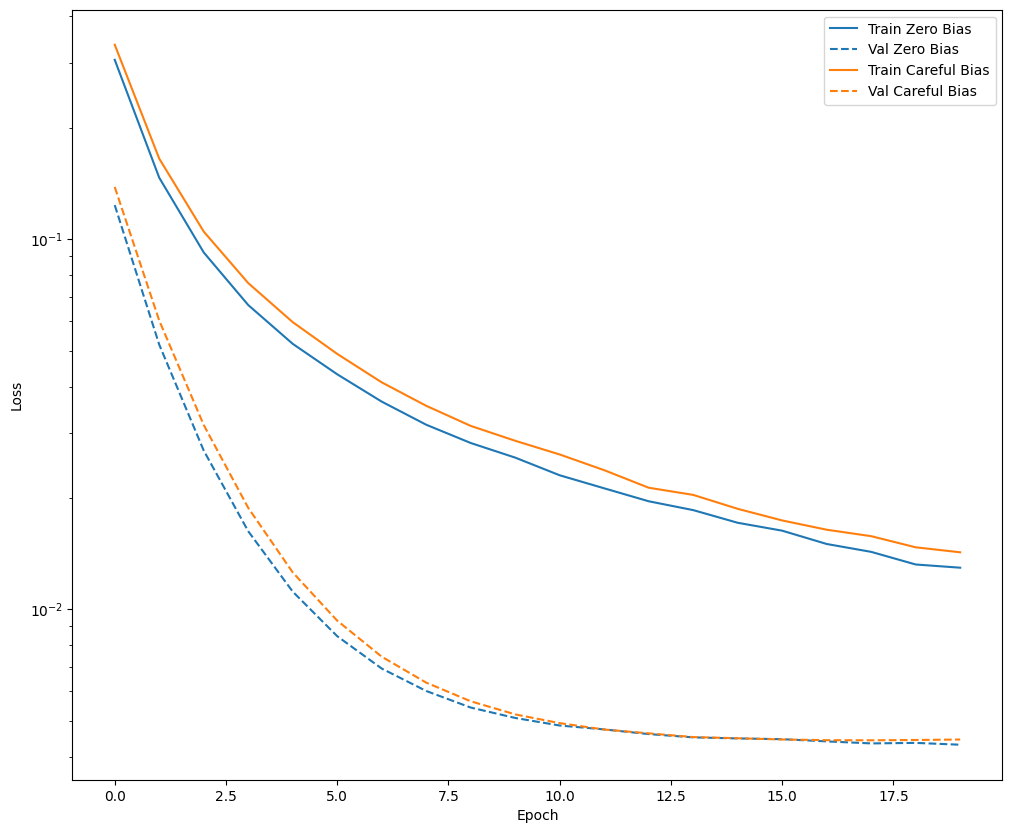

In [48]:
plot_loss(zero_bias_history, "Zero Bias", 0)
plot_loss(careful_bias_history, "Careful Bias", 1)

In [49]:
model = make_model()
model.load_weights(initial_weights)
baseline_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[early_stopping],
    validation_data=(val_features, val_labels))

Epoch 1/100
90/90 [==============================] - 1s 6ms/step - loss: 0.3356 - cross entropy: 0.2693 - Brier Score: 0.0797 - tp: 123.0000 - fp: 21516.0000 - tn: 205940.0000 - fn: 266.0000 - precision: 0.0057 - recall: 0.3162 - auc: 0.5607 - prc: 0.0197 - val_loss: 0.1382 - val_cross entropy: 0.1382 - val_Brier Score: 0.0225 - val_tp: 5.0000 - val_fp: 19.0000 - val_tn: 45468.0000 - val_fn: 77.0000 - val_precision: 0.2083 - val_recall: 0.0610 - val_auc: 0.4881 - val_prc: 0.0438
Epoch 2/100
90/90 [==============================] - 0s 2ms/step - loss: 0.1628 - cross entropy: 0.1628 - Brier Score: 0.0392 - tp: 70.0000 - fp: 6183.0000 - tn: 175786.0000 - fn: 237.0000 - precision: 0.0112 - recall: 0.2280 - auc: 0.5337 - prc: 0.0654 - val_loss: 0.0583 - val_cross entropy: 0.0583 - val_Brier Score: 0.0056 - val_tp: 20.0000 - val_fp: 4.0000 - val_tn: 45483.0000 - val_fn: 62.0000 - val_precision: 0.8333 - val_recall: 0.2439 - val_auc: 0.7057 - val_prc: 0.3034
Epoch 3/100
90/90 [===============

In [50]:
def plot_metrics(history):
  metrics = ['loss', 'prc', 'precision', 'recall']
  for n, metric in enumerate(metrics):
    name = metric.replace("_"," ").capitalize()
    plt.subplot(2,2,n+1)
    plt.plot(history.epoch, history.history[metric], color=colors[0], label='Train')
    plt.plot(history.epoch, history.history['val_'+metric],
             color=colors[0], linestyle="--", label='Val')
    plt.xlabel('Epoch')
    plt.ylabel(name)
    if metric == 'loss':
      plt.ylim([0, plt.ylim()[1]])
    elif metric == 'auc':
      plt.ylim([0.8,1])
    else:
      plt.ylim([0,1])

    plt.legend()

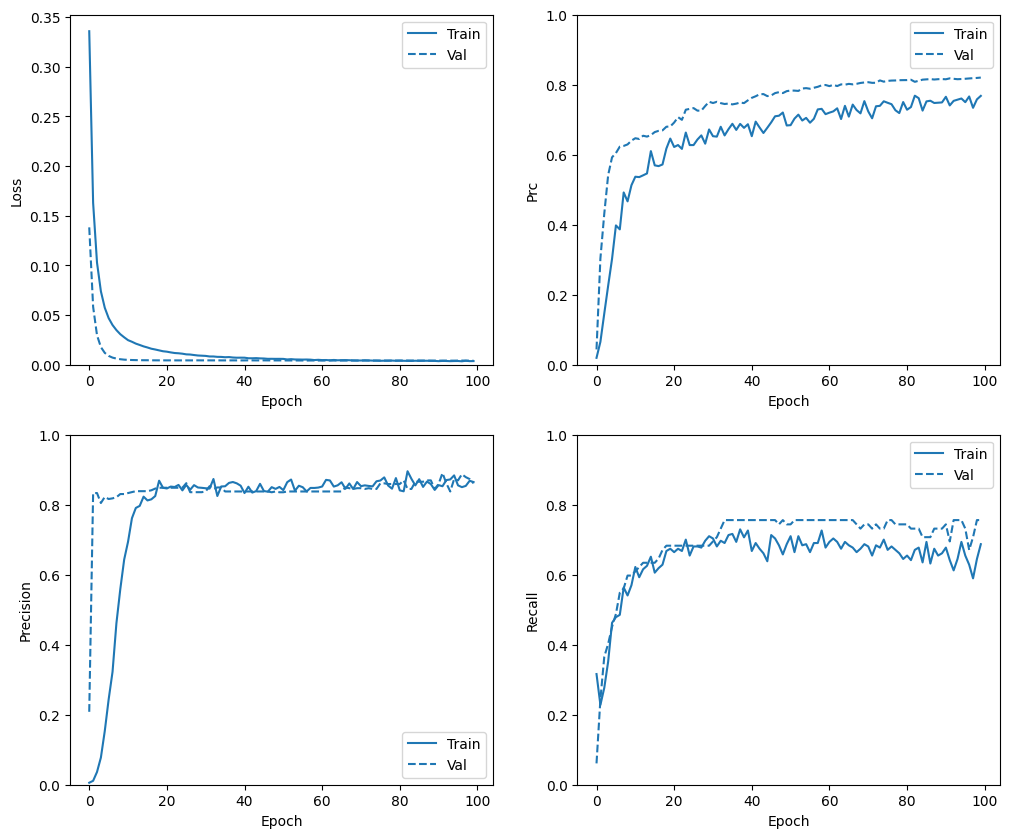

In [51]:
plot_metrics(baseline_history)

In [58]:
train_predictions_baseline = model.predict(train_features, batch_size=BATCH_SIZE)
test_predictions_baseline = model.predict(test_features, batch_size=BATCH_SIZE)

28/28 [==============================] - 0s 605us/step


In [54]:
def plot_cm(labels, predictions, threshold=0.5):
  cm = confusion_matrix(labels, predictions > threshold)
  plt.figure(figsize=(5,5))
  sns.heatmap(cm, annot=True, fmt="d")
  plt.title('Confusion matrix @{:.2f}'.format(threshold))
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')

  print('Legitimate Transactions Detected (True Negatives): ', cm[0][0])
  print('Legitimate Transactions Incorrectly Detected (False Positives): ', cm[0][1])
  print('Fraudulent Transactions Missed (False Negatives): ', cm[1][0])
  print('Fraudulent Transactions Detected (True Positives): ', cm[1][1])
  print('Total Fraudulent Transactions: ', np.sum(cm[1]))

loss :  0.0040846699848771095
cross entropy :  0.0040846699848771095
Brier Score :  0.0004687546461354941
tp :  84.0
fp :  8.0
tn :  56851.0
fn :  19.0
precision :  0.9130434989929199
recall :  0.8155339956283569
auc :  0.9317259192466736
prc :  0.83523029088974

Legitimate Transactions Detected (True Negatives):  56851
Legitimate Transactions Incorrectly Detected (False Positives):  8
Fraudulent Transactions Missed (False Negatives):  19
Fraudulent Transactions Detected (True Positives):  84
Total Fraudulent Transactions:  103


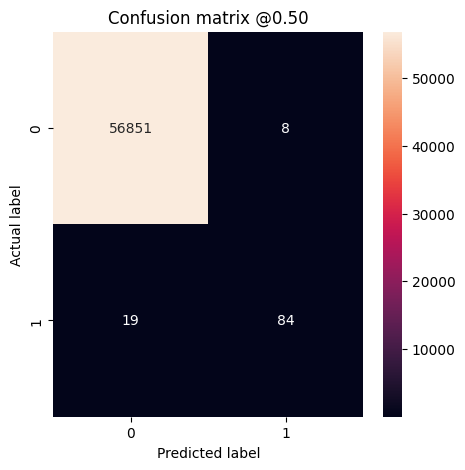

In [59]:
baseline_results = model.evaluate(test_features, test_labels,
                                  batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(model.metrics_names, baseline_results):
  print(name, ': ', value)
print()

plot_cm(test_labels, test_predictions_baseline)

Legitimate Transactions Detected (True Negatives):  56835
Legitimate Transactions Incorrectly Detected (False Positives):  24
Fraudulent Transactions Missed (False Negatives):  18
Fraudulent Transactions Detected (True Positives):  85
Total Fraudulent Transactions:  103
Legitimate Transactions Detected (True Negatives):  56742
Legitimate Transactions Incorrectly Detected (False Positives):  117
Fraudulent Transactions Missed (False Negatives):  16
Fraudulent Transactions Detected (True Positives):  87
Total Fraudulent Transactions:  103


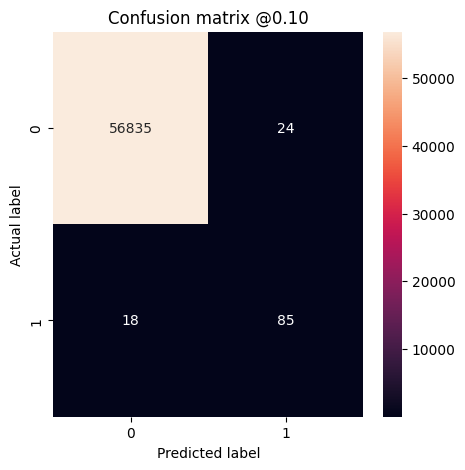

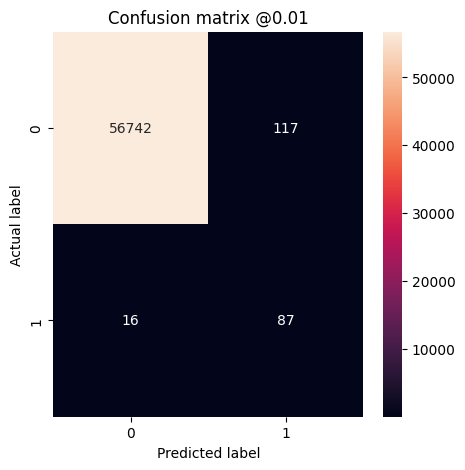

In [60]:
plot_cm(test_labels, test_predictions_baseline, threshold=0.1)
plot_cm(test_labels, test_predictions_baseline, threshold=0.01)

In [61]:
def plot_roc(name, labels, predictions, **kwargs):
  fp, tp, _ = sklearn.metrics.roc_curve(labels, predictions)

  plt.plot(100*fp, 100*tp, label=name, linewidth=2, **kwargs)
  plt.xlabel('False positives [%]')
  plt.ylabel('True positives [%]')
  plt.xlim([-0.5,20])
  plt.ylim([80,100.5])
  plt.grid(True)
  ax = plt.gca()
  ax.set_aspect('equal')

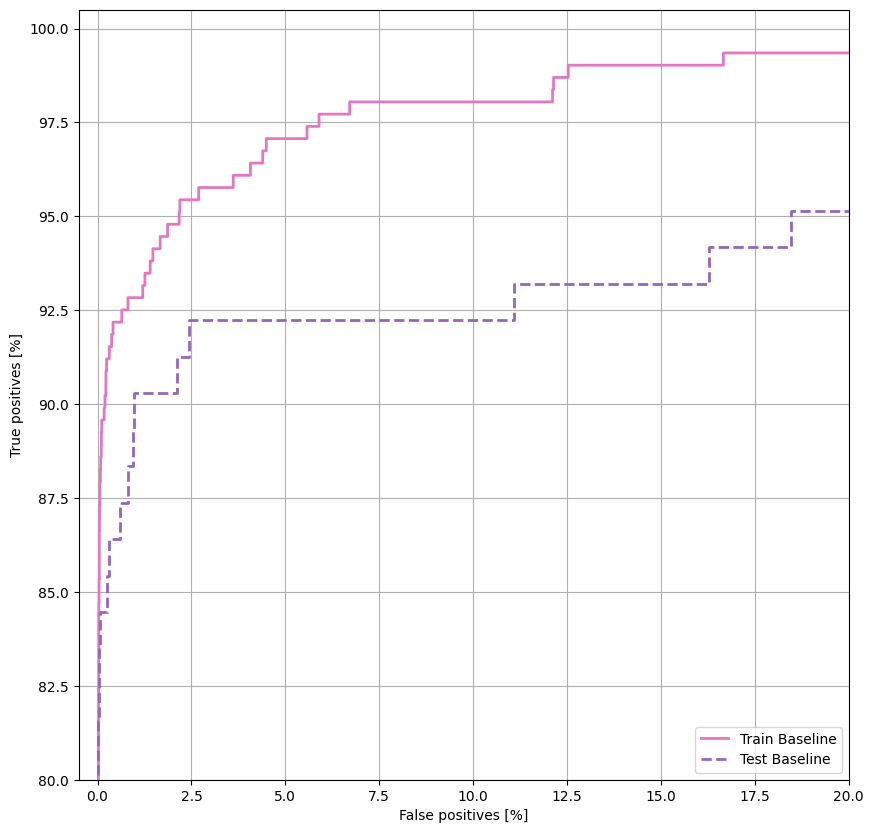

In [66]:
plot_roc("Train Baseline", train_labels, train_predictions_baseline, color=colors[6])
plot_roc("Test Baseline", test_labels, test_predictions_baseline, color=colors[4], linestyle='--')
plt.legend(loc='lower right');

In [67]:
def plot_prc(name, labels, predictions, **kwargs):
    precision, recall, _ = sklearn.metrics.precision_recall_curve(labels, predictions)

    plt.plot(precision, recall, label=name, linewidth=2, **kwargs)
    plt.xlabel('Precision')
    plt.ylabel('Recall')
    plt.grid(True)
    ax = plt.gca()
    ax.set_aspect('equal')

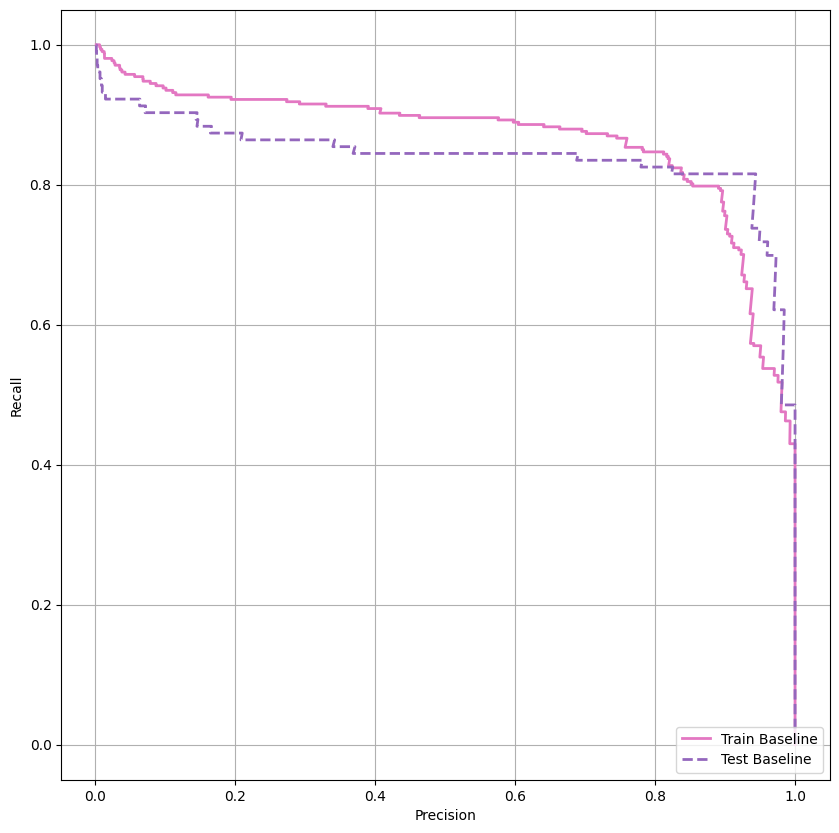

In [68]:
plot_prc("Train Baseline", train_labels, train_predictions_baseline, color=colors[6])
plot_prc("Test Baseline", test_labels, test_predictions_baseline, color=colors[4], linestyle='--')
plt.legend(loc='lower right');